In [70]:
import pandas as pd
# data analysis and wrangling
from pandas import DataFrame
import numpy as np
import random as rnd
import math
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as stats

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
#from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# pipeline setup
#from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
# cross validation
from sklearn.model_selection import KFold
# Import the evaluation matrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve


from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.metrics import plot_precision_recall_curve

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# evaluation on test data
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# import library for Gradient Boosting

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
#import imbalance for SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline

#import pickle
import pickle
import joblib
from joblib import parallel_backend
from sklearn.utils import class_weight

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix


#for NN network
import tensorflow as tf    
from tensorflow import keras  

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, auc 
from sklearn.dummy import DummyClassifier

from keras.utils.all_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras import losses, metrics
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

Let's take a look at the target data, and we see that we have an imbalanced dataset.

In [3]:
data = pd.read_csv('\\Users\\eggfr\\Flatiron\\Flatiron_phase5_project\\data\\Auto_Train_Dataset.csv')
data["Default"].value_counts(normalize=True)

C:\Users\eggfr\AppData\Local\Temp\ipykernel_14724\4286842458.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('\\Users\\eggfr\\Flatiron\\Flatiron_phase5_project\\data\\Auto_Train_Dataset.csv')


0    0.919208
1    0.080792
Name: Default, dtype: float64

Let's seperate our feature variables and target variables, which is default.

In [4]:
x = data.drop(["Default"], axis=1)
y = data["Default"]

# Train Test Split

Lets's do a test train

In [5]:
def print_cv_scores(pipe, x, y):
    '''
    using given pipeline and prints the training and cross_val scores
    '''
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']
    # This speeds up the processing
    with parallel_backend('threading', n_jobs=-1):
        # Pass in pipe to cross validate along with a feature list; keep standard 5-fold cross-validation
        results = cross_validate(pipe, x, y, cv=5, return_train_score=True, scoring=scoring)
    
    print(f"Training Accuracy: {round(results['train_accuracy'].mean(), 6)}")
    print(f"Cross_Val Accuracy: {round(results['test_accuracy'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro Precision: {round(results['train_precision_macro'].mean(), 6)}")
    print(f"Cross_Val Macro Precision: {round(results['test_precision_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro Recall: {round(results['train_recall_macro'].mean(), 6)}")
    print(f"Cross_Val Macro Recall: {round(results['test_recall_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro F1 Score: {round(results['train_f1_macro'].mean(), 6)}")
    print(f"Cross_Val Macro F1 Score: {round(results['test_f1_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro AUC Score: {round(results['train_roc_auc_ovr'].mean(), 6)}")
    print(f"Cross_Val Macro AUC Score: {round(results['test_roc_auc_ovr'].mean(), 6)}")

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create Column Transformer to Preprocess Data

Let's set up a column transformer first. This columntransformer is made up 5 different pipelines. They are first imputed with the data as disccused in the EDA sections. For categorical variables, it will be transformed with either one hot encoder or ordinal encorder. Then, they will be all set up in the columntransformer.  

In [7]:
#Lets Set up the column transformer
Client_Education_list = ['Junior secondary','Secondary','Graduation dropout','Graduation','Post Grad']
Client_Marital_Status_list = ['D','W','M','S']
ohe_cols = ['Accompany_Client','Client_Income_Type','Client_Gender','Loan_Contract_Type','Client_Housing_Type','Application_Process_Day','Application_Process_Hour']
num_cols = list(x.select_dtypes(['int', 'float']).columns)

nominal_Client_Occupation_pipeline = Pipeline([
    ('onehotimputer',SimpleImputer(strategy = 'constant',fill_value= "Other") ),
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown='ignore')), 
    ('onehotnorm', StandardScaler())])

numeric_pipeline = Pipeline([
    ('numimputer', SimpleImputer(strategy = 'mean')), 
    ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False,handle_unknown='ignore')), 
    ('onehotnorm', StandardScaler())])

ordinal_Client_Marital_Status_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [Client_Marital_Status_list])),
    ('ordnorm', StandardScaler())])

ordinal_Client_Education_pipeline = Pipeline([
     ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [Client_Education_list])),
     ('ordnorm', StandardScaler())])

ct = ColumnTransformer(
    [ ("ordinalpipe", ordinal_Client_Education_pipeline, ['Client_Education']),
       ("ordinalpipe2", ordinal_Client_Marital_Status_pipeline, ['Client_Marital_Status']),
       ("nominalpipe", nominal_pipeline,ohe_cols),
       ("nominalpipe2", nominal_Client_Occupation_pipeline,['Client_Occupation']),
       ("numpipe", numeric_pipeline, num_cols)])

# Pipeline and Baseline Model

We use SMOTE to oversample our data. However, SMOTE doesn't work if we only use 1 sklearn pipeline as it doesn't has the fit_transfrom function. We have to break it into 2 different pipelines. One for preprocessing data with column transformer and SMOTE, and the other is for the modeling pipeline. Standscaler is used to scaled the data after SMOTE. PCA is used for feature selection at .9.

In [8]:
# Need to seperate 2 pipelines
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))
                    ])  #setup preprocessing pipeline

baseline_pipe = Pipeline([('standardscaler', StandardScaler()),
                          ('PCA',PCA(n_components= .9)),
                          ('classifier', DummyClassifier(strategy='most_frequent'))]) #set up model pipeline

In [9]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

Let's check to see if our y_train data is balanced.

In [10]:
print(y_resampled.value_counts())

0    89586
1    89586
Name: Default, dtype: int64


That's 50-50 for both classes instead of 92%-8%.

In [11]:
print_cv_scores(baseline_pipe, x_resampled, y_resampled.values.ravel())

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\preprocessing\_data.py:950: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(self.var_), copy=False, constant_mask=constant_mask
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and 

Training Accuracy: 0.500001
Cross_Val Accuracy: 0.499994
----------------------------------------
Training Macro Precision: 0.250001
Cross_Val Macro Precision: 0.249997
----------------------------------------
Training Macro Recall: 0.5
Cross_Val Macro Recall: 0.5
----------------------------------------
Training Macro F1 Score: 0.333334
Cross_Val Macro F1 Score: 0.333331
----------------------------------------
Training Macro AUC Score: 0.5
Cross_Val Macro AUC Score: 0.5


In [12]:
 baseline_pipe.fit(x_resampled, y_resampled)  #train the baseline model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('PCA', PCA(n_components=0.9)),
                ('classifier', DummyClassifier(strategy='most_frequent'))])

We also need to transfrom x_test_data.

In [13]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test) #transform x_test_data

In [14]:
y_pred0 = baseline_pipe.predict(x_test_processed) #baseline model prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


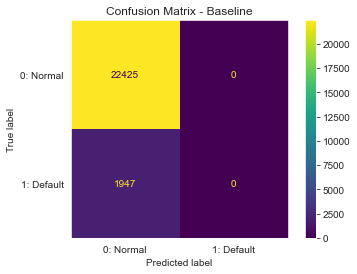

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22425
           1       0.00      0.00      0.00      1947

    accuracy                           0.92     24372
   macro avg       0.46      0.50      0.48     24372
weighted avg       0.85      0.92      0.88     24372



C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#plot the confusion matrix
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(baseline_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Baseline')
plt.show()

baseline_classification_report = classification_report(y_test, y_pred0)
print(baseline_classification_report)

In [16]:
roc=roc_auc_score(y_test, y_pred0)
acc = accuracy_score(y_test, y_pred0)
prec = precision_score(y_test, y_pred0)
rec = recall_score(y_test, y_pred0)
f1 = f1_score(y_test, y_pred0)

sum_results = pd.DataFrame([['Baseline', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
sum_results

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.920113,0.0,0.0,0.0,0.5


Baseline model achieve 92% accuracy as there is 92% normal cases. However, it doesn't do well as it has 0% in precision and recall.

# Logistic Regression

Let's do a regular Regression Model.

In [17]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

logreg_pipe = Pipeline([
                        
                        ('logreg', LogisticRegression(random_state=42))]) #set up model pipeline

In [18]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [19]:
print_cv_scores(logreg_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 0.663727
Cross_Val Accuracy: 0.663011
----------------------------------------
Training Macro Precision: 0.663843
Cross_Val Macro Precision: 0.663151
----------------------------------------
Training Macro Recall: 0.663727
Cross_Val Macro Recall: 0.663011
----------------------------------------
Training Macro F1 Score: 0.663667
Cross_Val Macro F1 Score: 0.66294
----------------------------------------
Training Macro AUC Score: 0.720463
Cross_Val Macro AUC Score: 0.719633


In [20]:
logreg_pipe.fit(x_resampled, y_resampled)  #train the logreg model

Pipeline(steps=[('logreg', LogisticRegression(random_state=42))])

In [21]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [22]:
y_pred1 = logreg_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


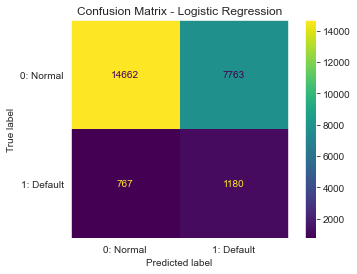

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     22425
           1       0.13      0.61      0.22      1947

    accuracy                           0.65     24372
   macro avg       0.54      0.63      0.50     24372
weighted avg       0.88      0.65      0.73     24372



In [23]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(logreg_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

baseline_classification_report = classification_report(y_test, y_pred1)
print(baseline_classification_report)

In [24]:
roc=roc_auc_score(y_test, y_pred1)
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_14724\3551474236.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.920113,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.650008,0.131947,0.606061,0.216713,0.629942


Even though our cross validation has a decent score, we still have a really poor F1 score when we compare to our test set.

In [25]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

logreg_pipe = Pipeline([
                        ('logreg', LogisticRegression(random_state=42))]) #set up model pipeline

Data need to fed into preprocessing pipeline first before GridSearch

In [26]:
#x_test_processed = pre_pipe.named_steps['ct'].transform(x_test) #preprocessing for x_test

Going to optimize regulation strength and maximum number of iteraion to improve the model performance.

In [27]:
#pipe_grid = {'logreg__C': [10, 15, 20], 
#              'logreg__max_iter': [200, 300]
         
#            }

#model_2_gs_pipe = GridSearchCV(estimator= logreg_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=3,  # 3-fold cross-validation
#                             scoring= "roc_auc",
#                             n_jobs=-1,  # Speed up computational time by using all processors
#                             verbose=True)  # Print how many folds, candidates, and fits we're solving for    
#with parallel_backend('threading', n_jobs=-1):
#        model_2_gs_pipe.fit(x_resampled, y_resampled)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [28]:
# Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
#with open('model_2_gs_pipe.pkl', 'wb') as f:
#     joblib.dump(model_2_gs_pipe, f)

In [29]:
# Load in pickled object
with open('model_2_gs_pipe.pkl', 'rb') as f:
    model_2_gs_pipe = joblib.load(f)

In [30]:
optimal_C = model_2_gs_pipe.best_params_['logreg__C']
optimal_max_iter = model_2_gs_pipe.best_params_['logreg__max_iter']
logreg2_pipe = Pipeline([
                        ('logreg', LogisticRegression(C=optimal_C, max_iter=optimal_max_iter,random_state=42))]) #set up logestic regression w the best parameter
logreg2_pipe.fit(x_resampled, y_resampled)

Pipeline(steps=[('logreg',
                 LogisticRegression(C=20, max_iter=200, random_state=42))])

In [31]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [32]:
y_pred2 = logreg2_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


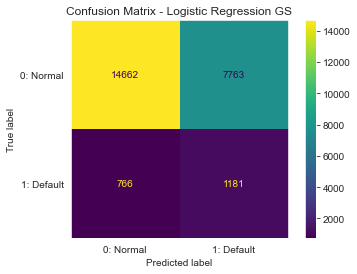

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     22425
           1       0.13      0.61      0.22      1947

    accuracy                           0.65     24372
   macro avg       0.54      0.63      0.50     24372
weighted avg       0.88      0.65      0.73     24372



In [33]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(logreg2_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Logistic Regression GS')
plt.show()

LogisticRegressionGS_classification_report = classification_report(y_test, y_pred2)
print(LogisticRegressionGS_classification_report)

In [34]:
roc=roc_auc_score(y_test, y_pred2)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

results = pd.DataFrame([['Logistic Regression GS', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_14724\3554742584.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.920113,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.650008,0.131947,0.606061,0.216713,0.629942
2,Logistic Regression GS,0.650049,0.132044,0.606574,0.216876,0.630199


There is not much improvement on the logistic regression gridsearch model. We are going to move on to the decision tree model.

# Decision Tree

In [35]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline   

dt_pipe = Pipeline([
                    
                    ('dt', DecisionTreeClassifier(random_state=42))]) #set up model pipeline  


In [36]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [37]:
print_cv_scores(dt_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 1.0
Cross_Val Accuracy: 0.909093
----------------------------------------
Training Macro Precision: 1.0
Cross_Val Macro Precision: 0.918722
----------------------------------------
Training Macro Recall: 1.0
Cross_Val Macro Recall: 0.909092
----------------------------------------
Training Macro F1 Score: 1.0
Cross_Val Macro F1 Score: 0.908058
----------------------------------------
Training Macro AUC Score: 1.0
Cross_Val Macro AUC Score: 0.909092


In [38]:
dt_pipe.fit(x_resampled, y_resampled)  #train the DT model

Pipeline(steps=[('dt', DecisionTreeClassifier(random_state=42))])

In [39]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [40]:
y_pred3 = dt_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


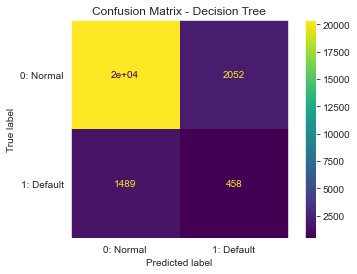

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     22425
           1       0.18      0.24      0.21      1947

    accuracy                           0.85     24372
   macro avg       0.56      0.57      0.56     24372
weighted avg       0.87      0.85      0.86     24372



In [41]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(dt_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_classification_report = classification_report(y_test, y_pred3)
print(dt_classification_report)

In [42]:
roc=roc_auc_score(y_test, y_pred3)
acc = accuracy_score(y_test, y_pred3)
prec = precision_score(y_test, y_pred3)
rec = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_14724\1179947049.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.920113,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.650008,0.131947,0.606061,0.216713,0.629942
2,Logistic Regression GS,0.650049,0.132044,0.606574,0.216876,0.630199
3,Decision Tree,0.854710,0.182470,0.235234,0.205519,0.571864


In [43]:
#pipe_grid = {    
#              'dt__min_samples_leaf': [5, 6, 7], #minimum number of samples required in the leaf mode
#              'dt__max_features': [10, 20, 30]} #number of features to decide on next split to prevent overfittinh

#model_dt_gs_pipe = GridSearchCV(estimator= dt_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=5,  # 5-fold cross-validation
#                             scoring= "roc_auc",
#                             n_jobs=-1,  # Speed up computational time by using all processors
#                             verbose=True)  # Print how many folds, candidates, and fits we're solving for
#with parallel_backend('threading', n_jobs=-1):
 #    model_dt_gs_pipe.fit(x_resampled, y_resampled)

In [44]:
##Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
#with open('model_dt_gs_pipe.pkl', 'wb') as f:
#     joblib.dump(model_dt_gs_pipe, f)

In [45]:
with open('model_dt_gs_pipe.pkl', 'rb') as f:
    model_dt_gs_pipe = joblib.load(f)

In [46]:
optimal_min_samples_leaf = model_dt_gs_pipe.best_params_['dt__min_samples_leaf']
optimal_max_features = model_dt_gs_pipe.best_params_['dt__max_features']
dt2_pipe = Pipeline([
                        ('dt',DecisionTreeClassifier(min_samples_leaf = optimal_min_samples_leaf, max_features=optimal_max_features, random_state=42))]) #set up logestic regression w the best parameter
dt2_pipe.fit(x_resampled, y_resampled)

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(max_features=30, min_samples_leaf=6,
                                        random_state=42))])

In [47]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [48]:
y_pred4 = dt_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


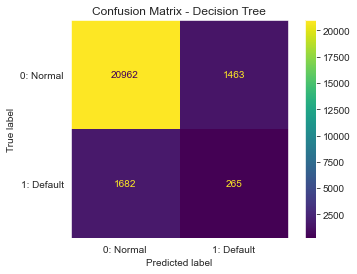

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     22425
           1       0.18      0.24      0.21      1947

    accuracy                           0.85     24372
   macro avg       0.56      0.57      0.56     24372
weighted avg       0.87      0.85      0.86     24372



In [49]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(dt2_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_classification_report = classification_report(y_test, y_pred4)
print(dt_classification_report)

In [50]:
roc=roc_auc_score(y_test, y_pred4)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

results = pd.DataFrame([['Decision Tree GS', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_14724\3459039034.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.920113,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.650008,0.131947,0.606061,0.216713,0.629942
2,Logistic Regression GS,0.650049,0.132044,0.606574,0.216876,0.630199
3,Decision Tree,0.854710,0.182470,0.235234,0.205519,0.571864
4,Decision Tree GS,0.854710,0.182470,0.235234,0.205519,0.571864


# Random forest

In [51]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

rf_pipe = Pipeline([
                     
                     ('rf_clf', RandomForestClassifier(random_state=42))]) #set up model pipeline

In [52]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [53]:
print_cv_scores(rf_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 1.0
Cross_Val Accuracy: 0.962657
----------------------------------------
Training Macro Precision: 1.0
Cross_Val Macro Precision: 0.97196
----------------------------------------
Training Macro Recall: 1.0
Cross_Val Macro Recall: 0.962656
----------------------------------------
Training Macro F1 Score: 1.0
Cross_Val Macro F1 Score: 0.961488
----------------------------------------
Training Macro AUC Score: 1.0
Cross_Val Macro AUC Score: 0.989688


In [54]:
rf_pipe.fit(x_resampled, y_resampled)  #train the RF model

Pipeline(steps=[('rf_clf', RandomForestClassifier(random_state=42))])

In [55]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)# train prepipeline get balanced data for test

In [56]:
y_pred4 = rf_pipe.predict(x_test_processed) # rf prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


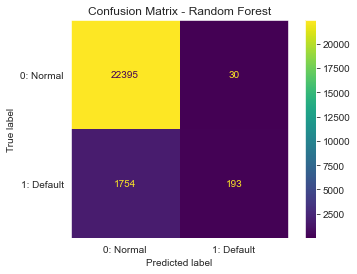

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22425
           1       0.87      0.10      0.18      1947

    accuracy                           0.93     24372
   macro avg       0.90      0.55      0.57     24372
weighted avg       0.92      0.93      0.90     24372



In [57]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(rf_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Random Forest')
plt.show()

rf_classification_report = classification_report(y_test, y_pred4)
print(rf_classification_report)

In [58]:
roc=roc_auc_score(y_test, y_pred4)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

results = pd.DataFrame([['Random Forrest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_14724\2163201458.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.920113,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.650008,0.131947,0.606061,0.216713,0.629942
2,Logistic Regression GS,0.650049,0.132044,0.606574,0.216876,0.630199
3,Decision Tree,0.854710,0.182470,0.235234,0.205519,0.571864
4,Decision Tree GS,0.854710,0.182470,0.235234,0.205519,0.571864
5,Random Forrest,0.926801,0.865471,0.099127,0.177880,0.548895


In [59]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

In [60]:
x_resampled_clean = np.asarray(x_resampled).astype(np.float32)
x_test_processed_clean = np.asarray(x_test_processed).astype(np.float32)
y_resampled_clean = np.asarray(y_resampled).astype(np.float32)
y_test_clean = np.asarray(y_test).astype(np.float32)

In [61]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [62]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [63]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'train_loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

Neural Network_baseline

In [66]:
model_nn_base = Sequential()
model_nn_base.add(Dense(16, input_shape=(97,), activation='relu')),
#model_24.add(Dropout(0.2)),
#model_24.add(Dense(32, activation='relu')),
#model_24.add(Dropout(0.2)),
#model_24.add(Dense(64, activation='relu')),
model_nn_base.add(Dense(1, activation='sigmoid'))
#Compile model
model_nn_base.compile(
                loss='binary_crossentropy', 
                optimizer= keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model_nn_base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                1568      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,585
Trainable params: 1,585
Non-trainable params: 0
_________________________________________________________________


In [72]:
# terminate training if doesnt improve on specified min_delta for 5 epochs
earlystopper = EarlyStopping(monitor='accuracy', min_delta = 1e-2, patience = 5)

In [73]:
results_nn_base = model_nn_base.fit(
                    x=x_resampled_clean, 
                    y=y_resampled_clean, 
                    epochs=10, 
                    batch_size=5, 
                    validation_split=0.15,
                    #validation_data=(x_validate, y_validate),
                    #class_weight=sklearn_weights,
                    callbacks = [earlystopper])

Epoch 1/10
30460/30460 [==============================] - 93s 3ms/step - loss: 0.5936 - tp: 33636.0000 - fp: 19098.0000 - tn: 70488.0000 - fn: 29074.0000 - accuracy: 0.6837 - precision: 0.6378 - recall: 0.5364 - auc: 0.7414 - prc: 0.6359 - val_loss: 0.7098 - val_tp: 16791.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 10085.0000 - val_accuracy: 0.6248 - val_precision: 1.0000 - val_recall: 0.6248 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 2/10
30460/30460 [==============================] - 92s 3ms/step - loss: 0.5513 - tp: 37869.0000 - fp: 17096.0000 - tn: 72490.0000 - fn: 24841.0000 - accuracy: 0.7246 - precision: 0.6890 - recall: 0.6039 - auc: 0.7910 - prc: 0.7111 - val_loss: 0.6223 - val_tp: 18692.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 8184.0000 - val_accuracy: 0.6955 - val_precision: 1.0000 - val_recall: 0.6955 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 3/10
30460/30460 [==============================] - 86s 3ms/step - loss: 0.5316 - tp: 38959.0000 

In [74]:
#Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
with open('model_nn_base.pkl', 'wb') as f:
     joblib.dump(model_nn_base, f)

TypeError: cannot pickle 'weakref' object

In [ ]:
with open('model_dt_gs_pipe.pkl', 'rb') as f:
    model_nn_base = joblib.load(f)

In [76]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(model_nn_base,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - NN Network')
plt.show()

nn_base_classification_report = classification_report(y_test, y_pred_nn_base)
print(nn_base_classification_report)

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

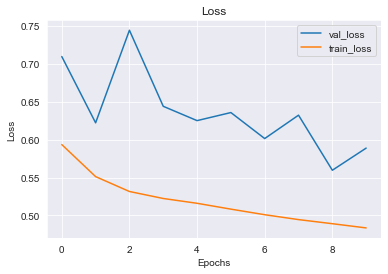

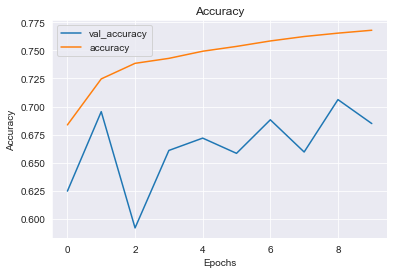

In [77]:
visualize_training_results(results_nn_base)

Add l1 regulaizer

In [80]:
from keras.regularizers import l1, l2

In [81]:
# establish the regularization strength of lambda
reg_l1 = l1(3e-3) # 1e-5 to .1

In [82]:
x_resampled_clean = np.asarray(x_resampled).astype(np.float32)
x_test_processed_clean = np.asarray(x_test_processed).astype(np.float32)
y_resampled_clean = np.asarray(y_resampled).astype(np.float32)
y_test_clean = np.asarray(y_test).astype(np.float32)

In [83]:
model_nn_l1 = Sequential()
model_nn_l1.add(Dense(16, input_shape=(97,), activation='relu')),
#model_24.add(Dropout(0.2)),
model_nn_l1.add(Dense(32, activation='relu')),
model_nn_l1.add(Dropout(0.2)),
model_nn_l1.add(Dense(32, 
                     activation='relu',
                     kernel_regularizer = reg_l1)),
model_nn_l1.add(Dense(1, activation='sigmoid'))
#Compile model
model_nn_l1.compile(
                loss='binary_crossentropy', 
                optimizer= keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model_nn_l1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                1568      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


In [84]:
results_nn_l1 = model_nn_l1.fit(
                    x=x_resampled_clean, 
                    y=y_resampled_clean, 
                    epochs=10, 
                    batch_size=5, 
                    validation_split=0.15,
                    #validation_data=(x_validate, y_validate),
                    #class_weight=sklearn_weights,
                    callbacks = [earlystopper])


Epoch 1/10
30460/30460 [==============================] - 105s 3ms/step - loss: 0.6162 - tp: 53112.0000 - fp: 20333.0000 - tn: 69253.0000 - fn: 36474.0000 - accuracy: 0.6829 - precision: 0.7232 - recall: 0.5929 - auc: 0.7565 - prc: 0.7663 - val_loss: 0.7608 - val_tp: 16320.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 10556.0000 - val_accuracy: 0.6072 - val_precision: 1.0000 - val_recall: 0.6072 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 2/10
30460/30460 [==============================] - 100s 3ms/step - loss: 0.5660 - tp: 40039.0000 - fp: 20157.0000 - tn: 69429.0000 - fn: 22671.0000 - accuracy: 0.7188 - precision: 0.6651 - recall: 0.6385 - auc: 0.7813 - prc: 0.6911 - val_loss: 0.7703 - val_tp: 16019.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 10857.0000 - val_accuracy: 0.5960 - val_precision: 1.0000 - val_recall: 0.5960 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 3/10
30460/30460 [==============================] - 102s 3ms/step - loss: 0.5448 - tp: 40770.0

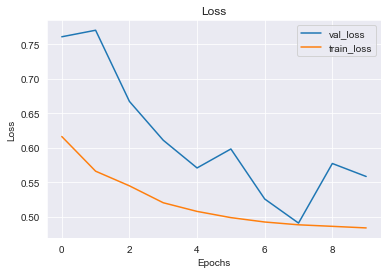

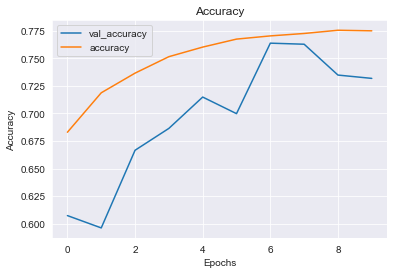

In [85]:
visualize_training_results(results_nn_l1)